In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('responses.csv')

In [3]:
columns = ['date', 'gender', 'age', 'education', 'occupation', 'family_income', 'residence', 'medium_social_traditional', 
              'traditional_media_device', 'social_media_sites', 'accounts_count', 'spending_hours', 'social_media_glance', 'addiction',
              'most_attracted_media', 'purpose_using', 'usual_ranking', 'purchasing', 'product_purchase_type', 'brand_following',
              'frequent_purchase_type', 'appealing_feature', 'feature_help_brand', 'info_search_feasibility', 'influence_try_new_brands',
              'trusting_brand', 'comm_reliable', 'comm_credible', 'comm_attractive', 'comm_desirable', 'comm_memorable',
              'imp_updates', 'decision_making', 'rele_info_purchase_preference', 'consumer_attention', 'imp_brand_build',
              'response', 'ads_new_brands', 'promote_brands_aware', 'percept_position', 'target_audience', 'brand_avail_purchase',
              'brand_engaging', 'feedback', 'recommed', 'suggestion']
df.columns = columns

In [4]:
def encode_decode(my_df, series_name, choice):
    arr_name = np.array(list(my_df[str(series_name)]))
    le = LabelEncoder()
    enc_res = le.fit_transform(arr_name)
    rev_res = le.inverse_transform(enc_res)
    if choice == 0:
        res = enc_res
    if choice == 1:
        res = rev_res
    return res

In [5]:
df.drop(columns=['suggestion'], axis=1, inplace=True)

In [6]:
dummy_cols = ['date']
orig_cols = list(df.columns)
for col in range(len(orig_cols)):
    if orig_cols[col] != 'date':
        dummy_cols.append(str(orig_cols[col] + '_' + str(col)))
df.columns = dummy_cols
df.head()

,date,gender_1,age_2,education_3,occupation_4,family_income_5,residence_6,medium_social_traditional_7,traditional_media_device_8,social_media_sites_9,...,imp_brand_build_35,response_36,ads_new_brands_37,promote_brands_aware_38,percept_position_39,target_audience_40,brand_avail_purchase_41,brand_engaging_42,feedback_43,recommed_44
0,2/22/2019 20:52:00,Female,36 - 40 years,Ph. D,Government Employee,10001 - 20000,Riyadh,Online Media (Social Media),Television,Smart Phone,...,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Yes,Yes
1,2/22/2019 20:53:45,Female,21 - 25 years,Under graduate,Businesswoman / Entrepreneur,40001 - 50000,Riyadh,"Traditional Media (TV, Radio, Newspapers, Maga...","Television, Radio, Magzine, Newspaper",Smart Phone,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
2,2/23/2019 14:31:40,Female,21 - 25 years,Under graduate,Student,20001 - 30000,Tabuk,Online Media (Social Media),Television,Smart Phone,...,Strongly Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Strongly Agree,Strongly Disagree,Neither Agree Nor Disagree,Strongly Disagree,Neither Agree Nor Disagree,Yes,No
3,2/23/2019 14:35:28,Female,21 - 25 years,Under graduate,Student,10001 - 20000,Riyadh,Online Media (Social Media),Television,Smart Phone,...,Strongly Agree,Agree,Strongly Agree,Strongly Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Neither Agree Nor Disagree,Agree,No,Yes
4,2/23/2019 14:37:31,Female,21 - 25 years,Under graduate,Student,20001 - 30000,Tabuk,Online Media (Social Media),Television,Smart Phone,...,Agree,Strongly Agree,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Yes,Yes


---

# H1: The increased usage of social media has resulted in completely avoiding the traditional media.

In [7]:
h1_df = df[['gender_1', 'age_2', 'medium_social_traditional_7', 'social_media_sites_9', 'accounts_count_10']]

Let us consider the sample of the data where it focuses on the usage of which type of media.  

In [8]:
ST_media = h1_df['medium_social_traditional_7'].value_counts().to_frame()
ST_media.reset_index(inplace=True)
ST_media.columns = ['medium', 'count']
ST_media.set_index('medium', inplace=True)
ST_media.index = ['Social Media', 'Traditional Media']
ST_media

,count
Social Media,133
Traditional Media,13


The above table shows that `Social Media` platform is heavily preferred than `Trditional Media`.

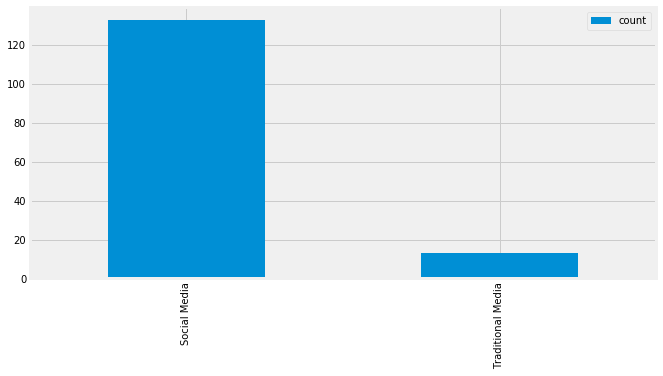

In [9]:
ST_media.plot(kind='bar', figsize=(10, 5))

This clearly shows that majority of the people use `Social Media` than `Traditional Media` which resulted in avoiding of the `Traditional Media`.

In [10]:
short_form = {
    'Media Sharing (YouTube, Snapchat, Instagram)' : 'MS',
    'Microblogging (Twitter, Tumblr)' : 'Mb',
    'Bookmarking & Content Curation Networks (Pinterest, Flipboard)' : 'BCCN',
    'Social Network (Facebook, LinkedIn)' : 'SN',
    'Video Sharing (Facebook Live, Periscope, Vimeo)' : 'VS',
    'Discussion Forums (Quora, Reddit, Digg)' : 'DF',
    'Consumer Review Networks (TripAdvisor, Zomato, Yelp)' : 'CRN',
    'Social Media Sites' : 'SMS'
}

In [15]:
SM = h1_df[h1_df['medium_social_traditional_7'] == 'Online Media (Social Media)']
S_sites = SM[['medium_social_traditional_7', 'accounts_count_10']]

rewrite_vals = []
for vals in S_sites.values:
    short_list = []
    for actual_val in vals:
        for key in short_form:
            if key in actual_val:
                short_list.append(actual_val.replace(actual_val, short_form[key]))
    rewrite_vals.append(short_list)

S_sites.loc[:, 'accounts_count_10'] = rewrite_vals
site_df = S_sites['accounts_count_10'].value_counts().to_frame()
site_df.reset_index(inplace=True)
site_df.columns = ['account_sites', 'count']
site_df.set_index('account_sites', inplace=True)
site_df

,count
account_sites,
[MS],48
"[MS, Mb]",38
"[MS, Mb, BCCN]",13
[Mb],6
"[MS, Mb, SN]",4
[SN],4
"[MS, Mb, BCCN, SN]",4
"[MS, SN]",3
"[MS, BCCN]",3


The above table depicts the social media sites that are been used by people. It clearly tell that `MS` i.e, `Media Sharing (YouTube, Snapchat, Instagram)` is majorly used.

In [12]:
TM_alone = h1_df[h1_df['medium_social_traditional_7'] != 'Online Media (Social Media)']
TM_age_grps = TM_alone['age_2'].value_counts().to_frame()
TM_age_grps.reset_index(inplace=True)
TM_age_grps.columns = ['age', 'count']
TM_age_grps

,age,count
0,21 - 25 years,5
1,31 - 35 years,4
2,26 - 30 years,2
3,Below 21 years,2


The above table shows the age groups of the people who use `Traditional Media` other than `Social Media`. There are totally `5` women in the age group of `21 - 25 years`. On the whole, there are `13` women who prefer `Traditional Media`.

**Conclusion:**

From the above results we can say that
1. Majority of the people prefer to use `Social Media` than `Traditional Media` and their most widely used platform is `Media Sharing (YouTube, Snapchat, Instagram)`.
2. There are also people who only use `Traditional Media` and they are ver less comparitively people whol use `Social Media`.

Hence we can conclude that the increased usage of social media has **majorly** resulted in avoiding the traditional media.

---

# H2: Social media has positive impact on Brand awareness and decision making in comparison with traditional media.

In [13]:
df.columns

Index(['date', 'gender_1', 'age_2', 'education_3', 'occupation_4',
       'family_income_5', 'residence_6', 'medium_social_traditional_7',
       'traditional_media_device_8', 'social_media_sites_9',
       'accounts_count_10', 'spending_hours_11', 'social_media_glance_12',
       'addiction_13', 'most_attracted_media_14', 'purpose_using_15',
       'usual_ranking_16', 'purchasing_17', 'product_purchase_type_18',
       'brand_following_19', 'frequent_purchase_type_20',
       'appealing_feature_21', 'feature_help_brand_22',
       'info_search_feasibility_23', 'influence_try_new_brands_24',
       'trusting_brand_25', 'comm_reliable_26', 'comm_credible_27',
       'comm_attractive_28', 'comm_desirable_29', 'comm_memorable_30',
       'imp_updates_31', 'decision_making_32',
       'rele_info_purchase_preference_33', 'consumer_attention_34',
       'imp_brand_build_35', 'response_36', 'ads_new_brands_37',
       'promote_brands_aware_38', 'percept_position_39', 'target_audience_40',
   

In [14]:
h2_df = df[['gender_1', 'age_2', 'usual_ranking_16', 'product_purchase_type_18', 'brand_following_19', 'frequent_purchase_type_20',
            'appealing_feature_21', 'feature_help_brand_22', 'info_search_feasibility_23', 'influence_try_new_brands_24', 'trusting_brand_25', 
            'comm_reliable_26', 'comm_credible_27', 'comm_attractive_28', 'comm_desirable_29', 'comm_memorable_30', 'imp_updates_31', 
            'decision_making_32', 'rele_info_purchase_preference_33', 'consumer_attention_34', 'imp_brand_build_35']]